**Let's import the library**

In [3]:
# for data exploraty
import pandas as pd, numpy as np

# for data viz.
import matplotlib.pyplot as plt, seaborn as sns

# for splitting data
from sklearn.model_selection import train_test_split
# for modelling 
from sklearn.linear_model import LinearRegression
# for evaluate the model
from sklearn import metrics

In [34]:
pd.set_option('display.max_rows', 10)
pd.options.display.float_format = '{:.2f}'.format

# Checkout the Data

from the data, we have 2 values (columns): GPA and SAT

> - 'GPA':  score finish the collage (IPK in indonesia)
> - 'SAT' : score for enter the collage (SBMPTN Score in indonesia)

we will see, the correlation about this

In [5]:
df = pd.read_csv('simple linear regression.csv')

In [35]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


**DATA CLEAN!**

# Exploraty Data Analyst (EDA)

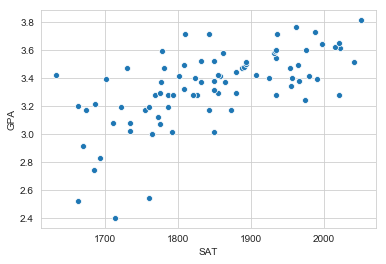

In [8]:
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='SAT', y='GPA')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


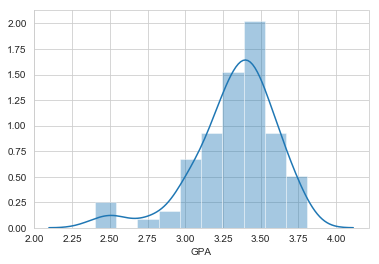

In [10]:
sns.distplot(df['GPA'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


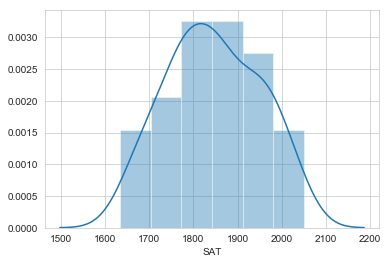

In [11]:
sns.distplot(df['SAT'])

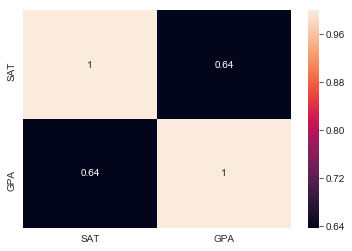

In [17]:
sns.heatmap(df.corr(), annot=True)

# Make a Model

**Splitting the Data**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df[['SAT']], 
                                                    df['GPA'],
                                                    test_size = 0.5,
                                                    random_state = 29
                                                   )

In [57]:
print("X_train shape is ", X_train.shape)
print("X_test shape is ", X_test.shape)
print("y_train shape is ", y_train.shape)
print("y_test shape is ", X_test.shape)

X_train shape is  (42, 1)
X_test shape is  (42, 1)
y_train shape is  (42,)
y_test shape is  (42, 1)


**Make a Model**

In [58]:
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
print("the coefficient is {}".format(model.coef_[0]))
print("the intercept is {}".format(model.intercept_))

the coefficient is 0.0018660762977786797
the intercept is -0.11850407092896109


so, from information above, we know the function is $$ y= -0.391639231439723 + x*0.00201135912886396$$

# Evaluation

before we see the error, we see the line of model predicting

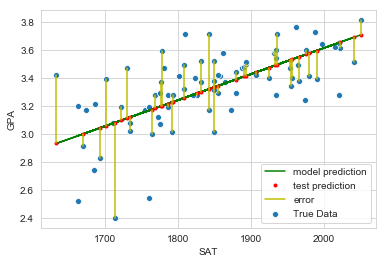

In [139]:
prediction_graph = model.predict(df[['SAT']])
prediction = model.predict(X_test)
sns.set_style("whitegrid")

# aktual data
sns.scatterplot(data=df, x='SAT', y='GPA', label='True Data')

# line of prediction model
plt.plot(df['SAT'], prediction_graph, 'g', label='model prediction')

# test prediction
plt.plot(X_test, prediction, '.r', label='test prediction')

# error bar
for i in range(len(ls_test)-1):
    plt.plot([ls_test[i],ls_test[i]], [ls_target[i],prediction[i]], 'y')
plt.plot([ls_test[-1],ls_test[-1]], [ls_target[-1],prediction[-1]], 'y', label='error')

# menampilkan legen
plt.legend(loc='lower right')

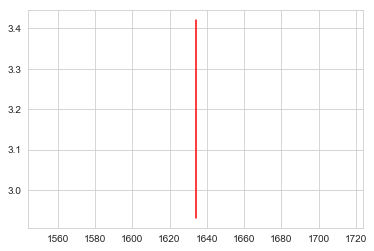

In [131]:
plt.figure()
ls_test=list(X_test['SAT'])
ls_target = list(y_test)
plt.plot([ls_test[1],ls_test[1]], [ls_target[1],prediction[1]], 'r')

**now, we see the error metrics**

In [62]:
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)
MAE = metrics.median_absolute_error(y_test, prediction)
R2 = metrics.r2_score(y_test, prediction)

In [63]:
pd.DataFrame({
    'score' : [MSE, RMSE, MAE, R2]
}, index=[ 'MSE', 'RMSE', 'MAE', 'R2'])

,score
MSE,0.05
RMSE,0.22
MAE,0.14
R2,0.30


RMSE is high enough for GPA. that means, if i input the SAT value, and the result of predict is 3.00. That full meaning is predict is 3.00 $\pm$ 0.22 

R2 score is very bad, 0.30. The prefect score is 1.0, that means, ur data is very fit with the actual data. 0.30 that means is no enough fit with the actual data. We can see that in the picture section Evaluation